In [266]:
import requests
web_address = 'https://api.coindesk.com/v1/bpi/currentprice.json'
import matplotlib.pyplot as plt
import matplotlib as mat
import time
from IPython.display import display, clear_output
plt.figure(figsize=(20,10))

In [278]:
def get_data(address, EUR_rate, GBP_rate, USD_rate, Update_time):
    r = requests.get(address).json()
    #if Update_time[-1] != r['time']['updated']:
    EUR_rate = EUR_rate + [float(r['bpi']['EUR']['rate'].replace(',',''))]
    GBP_rate = GBP_rate + [float(r['bpi']['GBP']['rate'].replace(',',''))]
    USD_rate = USD_rate + [float(r['bpi']['USD']['rate'].replace(',',''))]
    Update_time = Update_time + [r['time']['updated']]
    return EUR_rate, GBP_rate, USD_rate, Update_time

In [279]:
r = requests.get(web_address).json()
EUR_rate = [float(r['bpi']['EUR']['rate'].replace(',',''))]
GBP_rate = [float(r['bpi']['GBP']['rate'].replace(',',''))]
USD_rate = [float(r['bpi']['USD']['rate'].replace(',',''))]
Update_time = [r['time']['updated']]

In [280]:
EUR_rate

[5607.9634]

In [281]:
r

{'bpi': {'EUR': {'code': 'EUR',
   'description': 'Euro',
   'rate': '5,607.9634',
   'rate_float': 5607.9634,
   'symbol': '&euro;'},
  'GBP': {'code': 'GBP',
   'description': 'British Pound Sterling',
   'rate': '4,939.1942',
   'rate_float': 4939.1942,
   'symbol': '&pound;'},
  'USD': {'code': 'USD',
   'description': 'United States Dollar',
   'rate': '6,453.6200',
   'rate_float': 6453.62,
   'symbol': '&#36;'}},
 'chartName': 'Bitcoin',
 'disclaimer': 'This data was produced from the CoinDesk Bitcoin Price Index (USD). Non-USD currency data converted using hourly conversion rate from openexchangerates.org',
 'time': {'updated': 'Oct 22, 2018 03:34:00 UTC',
  'updatedISO': '2018-10-22T03:34:00+00:00',
  'updateduk': 'Oct 22, 2018 at 04:34 BST'}}

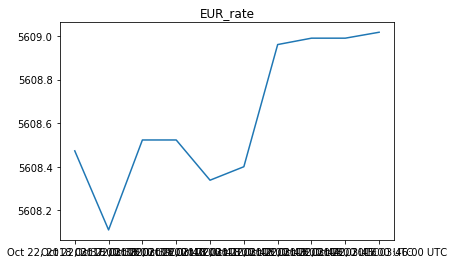

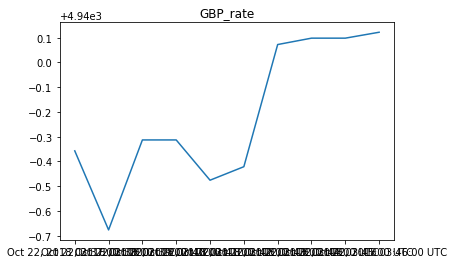

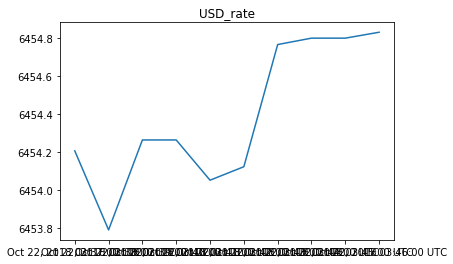

In [ ]:
while True:
    r = requests.get(web_address).json()
    if Update_time[-1] != r['time']['updated']:
        EUR_rate, GBP_rate, USD_rate, Update_time = get_data(web_address, EUR_rate, GBP_rate, USD_rate, Update_time)
        if len(Update_time) <= 10:
            clear_output()
            plt.plot(Update_time, EUR_rate)
            plt.title('EUR_rate')
            plt.show()
            #plt.ylim((min(EUR_rate), max(EUR_rate)))
            plt.plot(Update_time, GBP_rate)
            plt.title('GBP_rate')
            plt.show()
            plt.plot(Update_time, USD_rate)
            plt.title('USD_rate')
            plt.show()
            
            
            
        else:
            clear_output()
            plt.plot(Update_time[-10:], EUR_rate[-10:])
            #plt.ylim((min(EUR_rate[-10:]), max(EUR_rate[-10:])))
            plt.title('EUR_rate')
            plt.show()
            
            plt.plot(Update_time[-10:], GBP_rate[-10:])
            plt.title('GBP_rate')
            plt.show()
        
            plt.plot(Update_time[-10:], USD_rate[-10:])
            plt.title('USD_rate')
            plt.show()
        

        #all data
        #plt.plot(Update_time, EUR_rate)
        #plt.show()
    time.sleep(20)
    
    #print(EUR_rate)
    #print(Update_time)
    